# Import Data

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import sys
sys.path.append('../src')
from scipy.stats import skew, kurtosis


In [2]:
sns.set(context='talk', style='whitegrid') # seaborn里面的东西,‘talk’细节大一些好展示,’whitegrid‘设置格子,观察数据点
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# Helper display
def title(msg):
    print('\n' + '='*len(msg))
    print(msg)
    print('='*len(msg))

In [4]:
feature_data = pd.read_csv('../data/processed/features_winsorized.csv')
feature_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status,other_debtors,residence_since,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,4,A121,66,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882.0,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


# Pair Plot

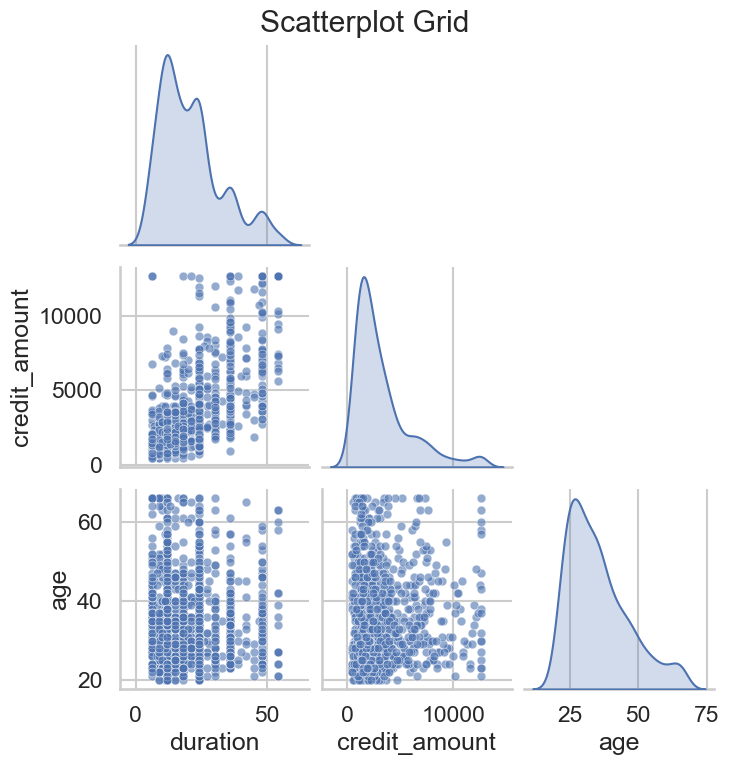

In [ ]:
# Select numeric columns and non-discrete columns
numeric_cols = feature_data.select_dtypes(include=[np.number]).columns.tolist()
discrete_cols = ['installment_rate', 'residence_since', 'existing_credits', 'num_dependents']
numeric_cols = [i for i in numeric_cols if i not in discrete_cols]
if len(numeric_cols) > 1:
    # Use corner=True to avoid redundant plots
    g = sns.pairplot(
        feature_data[numeric_cols], 
        diag_kind='kde', 
        corner=True,
        plot_kws={'alpha':0.6, 's':40}  # slight transparency and point size
    )
    
    plt.suptitle("Scatterplot Grid", y=1.02)
    plt.show()
else:
    print("Not enough numeric columns for a scatterplot grid. Add more numeric features to see pair plots.")


# Info & Description

In [ ]:
title('data info')
feature_data.info()
title('data descriptive statistics')
desc = feature_data[numeric_cols].describe().T
desc['skew'] = [skew(feature_data[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(feature_data[c].dropna()) for c in desc.index]
desc


data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings_account          1000 non-null   object 
 6   employment_since         1000 non-null   object 
 7   installment_rate         1000 non-null   int64  
 8   personal_status          1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  residence_since          1000 non-null   int64  
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   int64  
 13  other_installment_plans  1000 non-null   object 
 14  housing       

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
duration,1000.0,20.820000,11.740589,6.00,12.0,18.0,24.00,54.000,0.961869,0.291044
credit_amount,1000.0,3240.442175,2694.799046,453.91,1365.5,2319.5,3972.25,12681.035,1.682435,2.550392
age,1000.0,35.485000,11.182255,20.00,27.0,33.0,42.00,66.000,0.932930,0.213045


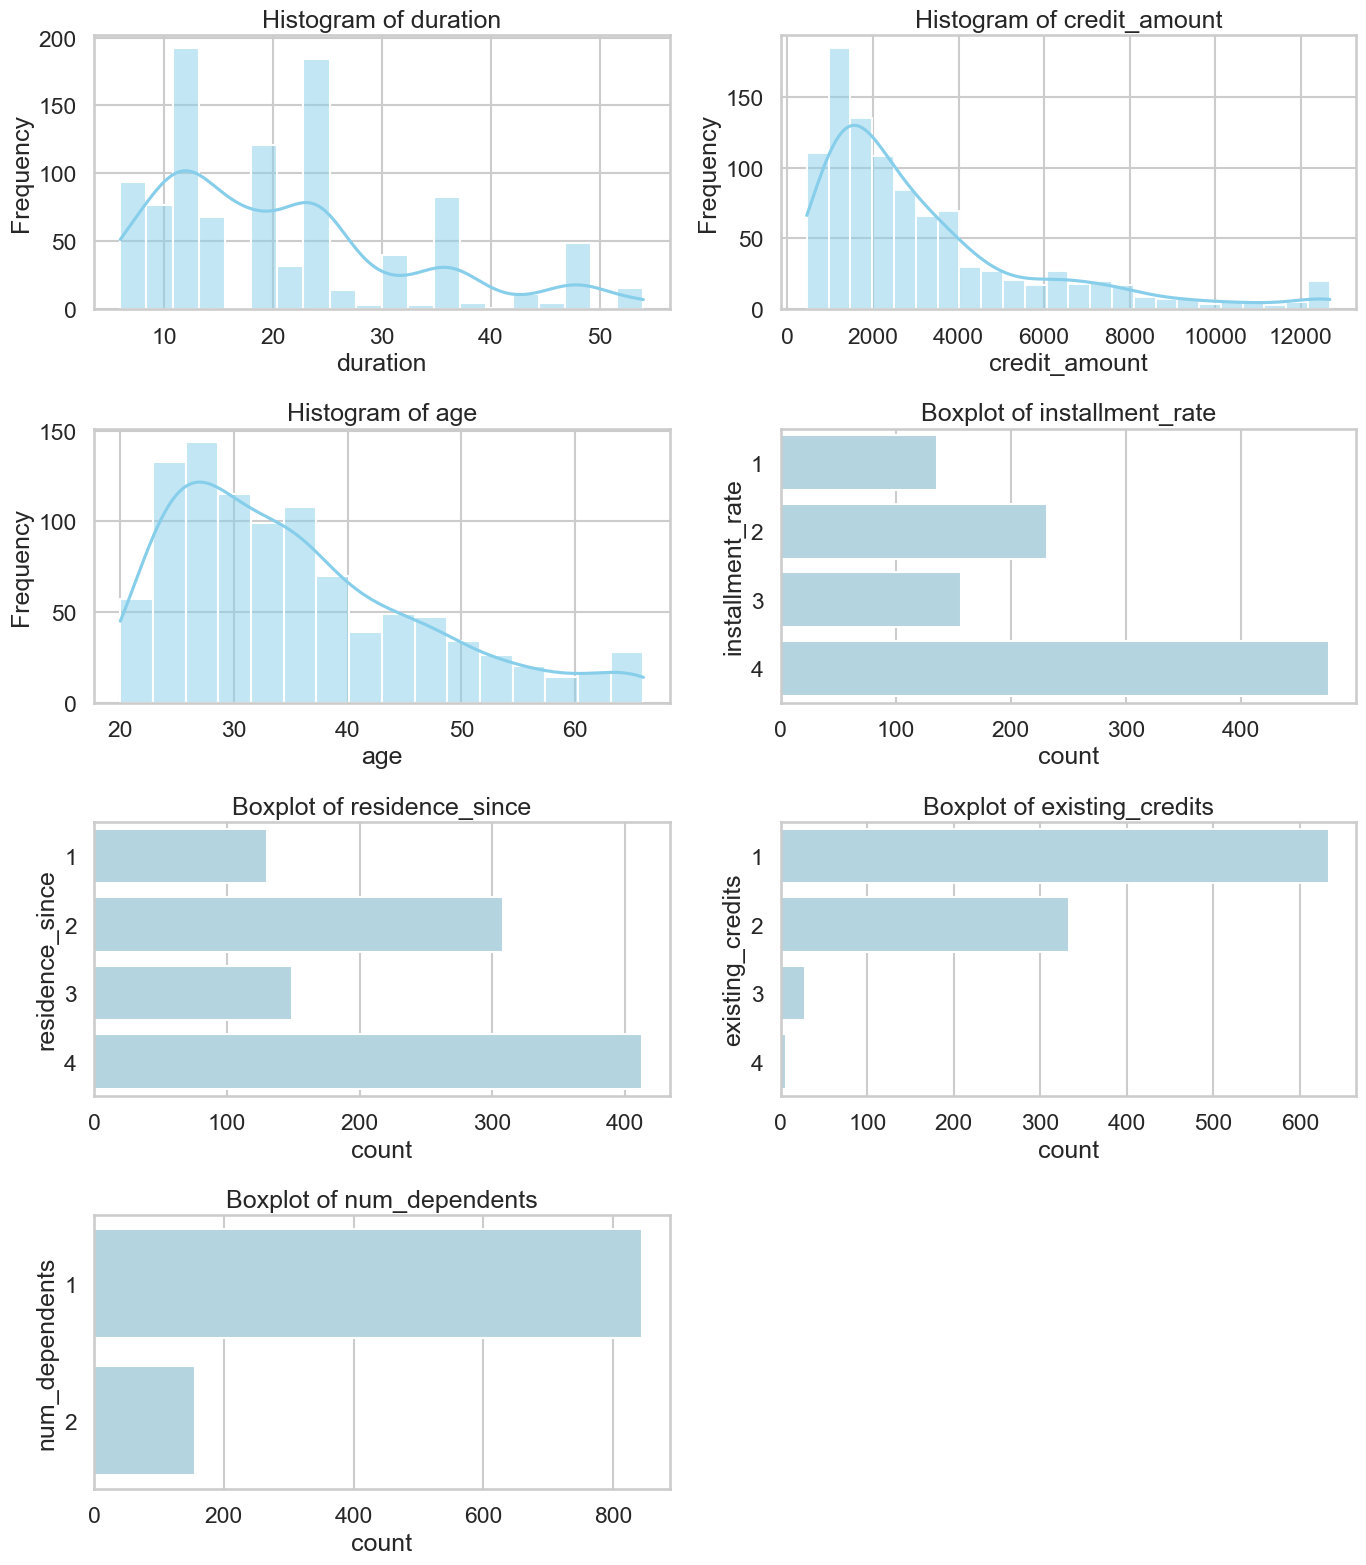

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(feature_data[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j, dcol in enumerate(discrete_cols):
    idx = len(numeric_cols) + j
    sns.countplot(y=feature_data[dcol], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Boxplot of {dcol}')
    axes[idx].set_ylabel(dcol)
    
# 删除多余的子图
if len(axes) > len(numeric_cols) + len(discrete_cols):
    for k in range(len(numeric_cols) + len(discrete_cols), len(axes)):
        fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

# Relationships

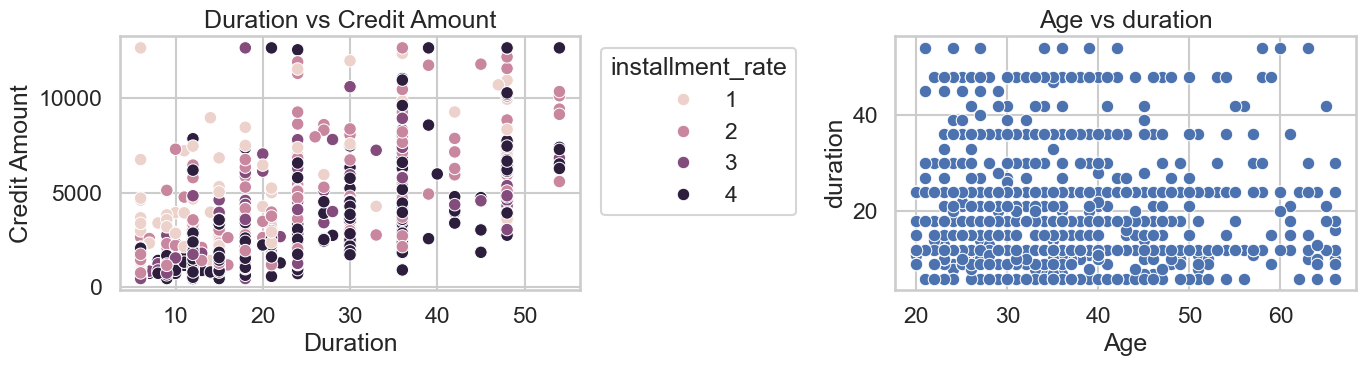

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot 1: duration vs credit amount
sns.scatterplot(data=feature_data, x='duration', y='credit_amount', hue='installment_rate', ax=axes[0])
axes[0].set_title('Duration vs Credit Amount')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Credit Amount')
# Place legend outside the plot
axes[0].legend(title='installment_rate', bbox_to_anchor=(1.02, 1), loc='upper left')

# Plot 2: Age vs duration
sns.scatterplot(data=feature_data, x='age', y='duration', ax=axes[1])
axes[1].set_title('Age vs duration')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('duration')

plt.tight_layout()
plt.show()

In [34]:
### Insights and Hypotheses for Feature Engineering

Based on the exploratory data analysis, here are some initial insights and hypotheses to guide feature engineering:

1.  **Skewed Numeric Features**:
    *   **Insight**: The distributions for `credit_amount`, `duration`, and `age` are all positively skewed. This is common in financial data but can negatively impact the performance of some machine learning models (e.g., linear models, SVMs).
    *   **Hypothesis**: Applying a log transformation to these skewed features (`np.log1p`) will normalize their distributions, reduce the influence of outliers, and likely improve model performance.

2.  **Relationship between Credit Amount and Duration**:
    *   **Insight**: There is a clear positive correlation between `credit_amount` and `duration`. As the loan amount increases, the repayment period tends to be longer.
    *   **Hypothesis**: Creating an interaction feature, such as `monthly_payment_estimate = credit_amount / duration`, could capture the payment pressure on the borrower more effectively than either feature alone. This new feature might have stronger predictive power.

3.  **Age and Credit Behavior**:
    *   **Insight**: There is no simple linear relationship between `age` and other key numeric variables like `credit_amount` or `duration`. The effect of age on credit risk might be non-linear.
    *   **Hypothesis**: Binning `age` into categorical groups (e.g., 'Young Adult', 'Adult', 'Senior') could capture these non-linear relationships more effectively. For instance, younger applicants might have different risk profiles than older ones, which isn't captured by a linear trend.

4.  **Categorical Features**:
    *   **Insight**: Many features are categorical (e.g., `purpose`, `housing`, `job`). These contain valuable information that needs to be encoded for machine learning models.
    *   **Hypothesis**: One-hot encoding these categorical features will allow models to learn distinct patterns associated with each category. For features with many categories, grouping less frequent ones might prevent model overfitting.

SyntaxError: unterminated string literal (detected at line 15) (1177411321.py, line 15)